# <center>Projet 6: Analysez les ventes d'une librairie avec Python<center>

<div>
<img src="logo-lapage.png" style = "width: 400px; height: 150px" title = "Lapage"/>
</div>

### <center>Réalisée par: Thi Tuong Le</center>
#### <center>Data Analyst</center>

## Sommaire (Part. 3)
1. [Librarie](#1.-Libraries)
2. [Dataset](#2.-Dataset)
3. [Réaliser un test statistique](#3.-Réaliser-un-test-statistique)

    3.1. [Etude de la corrélation entre genre et catégorie](#3.1.-Etude-de-la-corrélation-entre-genre-et-catégorie)
    
    3.2. [Etude de la corrélation entre âge et Chiffre d'affaires](#3.2.-Etude-de-la-corrélation-entre-âge-et-Chiffre-d'affaires)
    
    3.3. [Etude de la corrélation entre âge et fréquence d'achat](#3.3.-Etude-de-la-corrélation-entre-âge-et-fréquence-d'achat)
    
    3.4. [Etude de la corrélation entre âge et panier moyen](#3.4.-Etude-de-la-corrélation-entre-âge-et-panier-moyen)
    
    3.5. [Etude de la corrélation entre âge et catégorie de produit](#3.5.-Etude-de-la-corrélation-entre-âge-et-catégorie-de-produit)

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Dataset

In [2]:
# Current working directory
import os
os.getcwd()

"/Users/lethituong/Desktop/Data Analyst/P6-Analysez les ventes d'une librairie avec R ou Python/Ventes d'une librairie"

In [3]:
# Import le dataframe
df = pd.read_csv("df.csv")

In [4]:
df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day,age,age_ranges
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022,5,20,37,30-40
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1,2022,2,2,35,30-40
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0,2022,6,18,55,52-61
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2,2021,6,24,23,19-29
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0,2023,1,11,43,41-51


In [5]:
df.shape

(679332, 13)

**Pour répondre les questions de Julie, on doit tester de corrélation entre les clients et les produits concernant de critère dans ci-dessous:**
- **Sexe et Catégorie**
- **Age et Chiffre d'affaires**
- **Age et fréquence d'achat**
- **Age et Panier moyen**
- **Age et catégorie de produit**

## 3. Réaliser un test statistique

### 3.1. Etude de la corrélation entre genre et catégorie

**Je retire les 4 clients qui ont acheté énormément afin de ne pas biaiser les résultats de mes tests de corrélation.**

In [6]:
df_4_clients = df.loc[(df["client_id"] == "c_1609")|(df["client_id"] == "c_4958")|(df["client_id"] == "c_6714")|(df["client_id"] == "c_3454")]

In [7]:
# On drop les 4 clients
df.drop( df[ (df["client_id"] == "c_1609")|(df["client_id"] == "c_4958")|(df["client_id"] == "c_6714")|(df["client_id"] == "c_3454")].index, inplace=True)

**Les deux variables sont qualitatives -> Je choisie de réaliser le test du Chi² pour vérifier si ces 2 variables sont liées.**

In [8]:
# Création de la table de contingence
X = "sex"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print("tableau de contingence : ")
cont

tableau de contingence : 


categ,0,1,2,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [9]:
import scipy.stats as stats
chi2, p, dof, exp = stats.chi2_contingency(cont)

In [10]:
print(chi2)

20.200173796862927


In [11]:
print(p)

0.002551063708568263


In [12]:
if p > .05:
    print("H0: les valeurs sont independantes")
else:
    print("H1: Il y a une dépendance entre les deux valeurs.")

H1: Il y a une dépendance entre les deux valeurs.


In [13]:
#Tableau de contingence théorique
cont=cont.copy()
tx=df[X].value_counts()
ty=df[Y].value_counts()

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ['foo']
ty.columns= ['foo']
n = len(df)
indep = tx.dot(ty.T)/n

print("tableau des effectifs théoriques : ")
indep

tableau des effectifs théoriques : 


,0,1,2
f,201629.091062,110493.697251,17092.211687
m,185863.908938,101854.302749,15755.788313


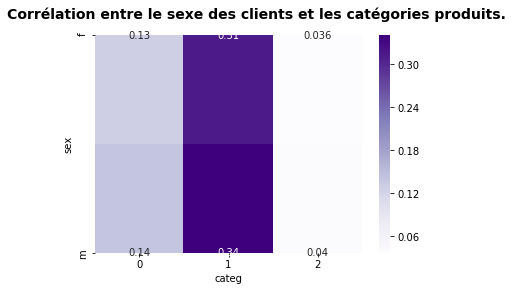

In [14]:
# Visualization 
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep

xi_n = measure.sum().sum()
table = measure/xi_n

fig = plt.figure()
sns.heatmap(table.iloc[:-1,:-1], annot=True, cmap="Purples")

plt.suptitle("Corrélation entre le sexe des clients et les catégories produits.", 
  fontweight="bold", 
  fontsize=14)
plt.show()

#Sauvegarde en PNG
fig.savefig('graph_contingence_sexes_categories.png')
plt.close(fig)

**On remarque une forte corrélation entre les hommes et la catégorie 1.**

### 3.2. Etude de la corrélation entre âge et Chiffre d'affaires

**Âge et CA: les deux variables quantitatives mais non linéaires. J'utilise le test de Spearman.**

In [15]:
df_age_ca = df[["age","price"]]

In [16]:
df_age_ca = df_age_ca.groupby("age").agg({"price":"sum"}).reset_index()

In [17]:
df_age_ca

,age,price
0,19,609013.69
1,20,178195.78
2,21,184209.27
3,22,178497.70
4,23,165029.26
...,...,...
71,90,5264.99
72,91,5043.19
73,92,2815.45
74,93,4013.87


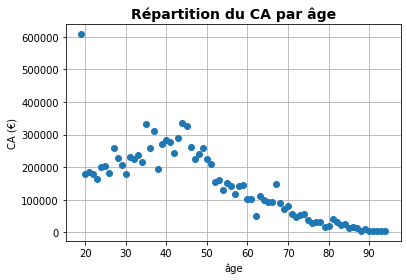

In [18]:
# Visualization
plt.plot(df_age_ca["age"],df_age_ca["price"],"o")
plt.xlabel("âge")
plt.ylabel("CA (€)")
plt.grid()
plt.title("Répartition du CA par âge", fontsize=14, fontweight="bold")
plt.show()


#Sauvegarde en PNG
fig.savefig("graph_repartition du CA par age.png")
plt.close(fig)

**Ce graphique a montré que les deux variables ne sont pas linéaires.**

In [19]:
from scipy import stats
from scipy.stats import spearmanr

In [20]:
stats.spearmanr(df_age_ca["age"],df_age_ca["price"])

SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)

**Avec une p-value de 7.352708223159905e-25, on peut rejeter l'hypothèse 0 et dire que les variables sont noncorrélées (-0.8736842105263158).**

In [21]:
# Calcul de la régression linéaire
#import scipy.stats as st
import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from scipy.stats.stats import pearsonr

X = df[["age"]]
Y = df["price"]

X = X.assign(intercept = [1]*X.shape[0])

lr = sm.OLS(Y, X).fit()
print(lr.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.039       
Dependent Variable: price            AIC:                5434282.4302
Date:               2022-03-25 12:39 BIC:                5434305.1457
No. Observations:   632689           Log-Likelihood:     -2.7171e+06 
Df Model:           1                F-statistic:        2.572e+04   
Df Residuals:       632687           Prob (F-statistic): 0.00        
R-squared:          0.039            Scale:              314.60      
-----------------------------------------------------------------------
             Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
age         -0.2583     0.0016   -160.3893   0.0000   -0.2614   -0.2551
intercept   29.0247     0.0761    381.1543   0.0000   28.8754   29.1739
---------------------------------------------------------------------
Omnibus:            655411.47

In [22]:
# Affichage de a et b, coefficients de ma droite de régression linéaire
print(lr.params)

age          -0.258285
intercept    29.024686
dtype: float64


In [23]:
# Stockage de a et b dans les variables correspondantes
a,b = lr.params["age"], lr.params["intercept"]

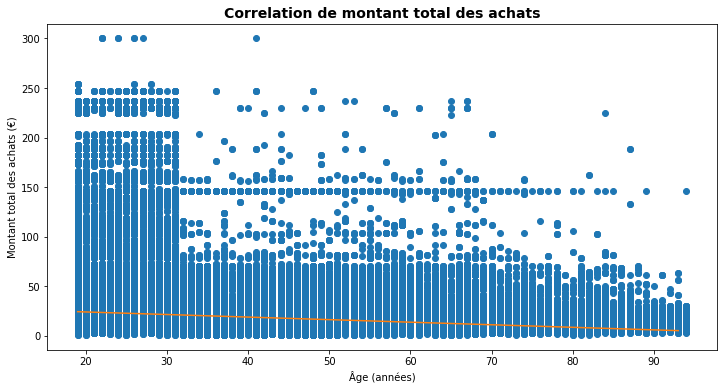

In [24]:
# Affichage du nuage de points avec la droite de régression linéaire

X = df["age"]
y = df["price"]
plt.figure(figsize=(12,6))
plt.plot(X, y, "o")
plt.plot(np.arange(min(X), max(X)), [a*x+b for x in np.arange(min(X), max(X))])
plt.title("Correlation de montant total des achats",  fontsize = 14, fontweight="bold")
plt.xlabel("Âge (années)")
plt.ylabel("Montant total des achats (€)")

#Sauvegarde en PNG
fig.savefig("graph_correlation age et ca.png")
plt.close(fig)

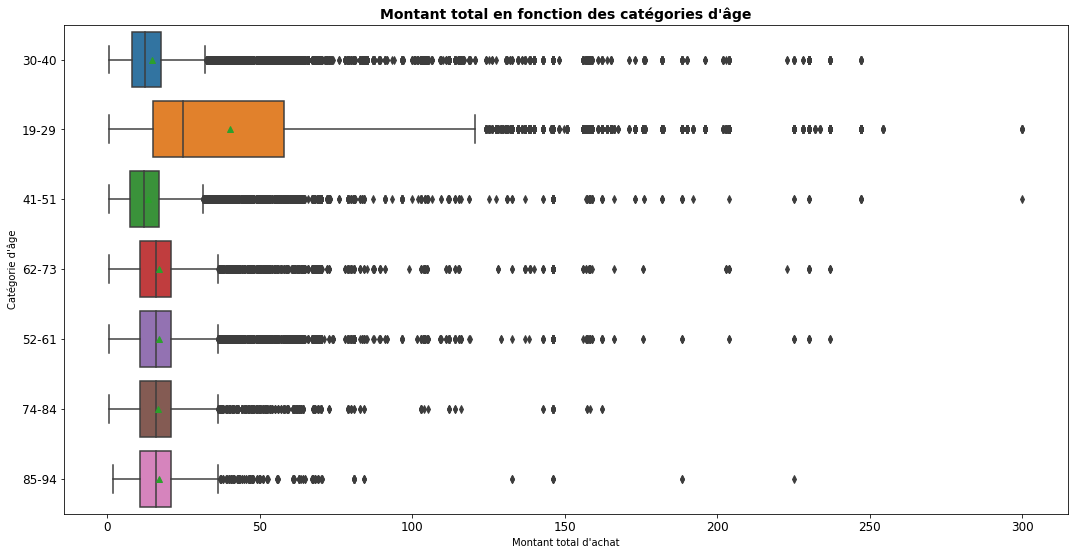

In [25]:
# Modélisation des boxplots

X = "price"
Y = "age_ranges" 

plt.figure(figsize=(18, 9))
sns.boxplot(x=df[X], y=df[Y], showmeans=True)
plt.title("Montant total en fonction des catégories d'âge", fontsize = 14, fontweight="bold")
plt.xlabel("Montant total d'achat")
plt.ylabel("Catégorie d'âge")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_boxplot age_ranges et montant.png")
plt.close(fig)

In [26]:
# Calcul de l'ANOVA (analyse de la variance)

from statsmodels.formula.api import ols

linear_model = ols("price ~ C(age_ranges)", data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                     sum_sq        df             F  PR(>F)
C(age_ranges)  3.906080e+07       6.0  24505.849479     0.0
Residual       1.680760e+08  632682.0           NaN     NaN


In [27]:
pvalue = linear_model.f_pvalue

In [28]:
pvalue

0.0

In [29]:
import math
rsquared = math.sqrt(linear_model.rsquared)
print('Ici le coefficient de corrélation est égal à {}'.format(rsquared))

Ici le coefficient de corrélation est égal à 0.4342521501229164


In [30]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())

                      Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.189       
Dependent Variable:   price              AIC:                  5327299.2885
Date:                 2022-03-25 12:39   BIC:                  5327378.7926
No. Observations:     632689             Log-Likelihood:       -2.6636e+06 
Df Model:             6                  F-statistic:          2.451e+04   
Df Residuals:         632682             Prob (F-statistic):   0.00        
R-squared:            0.189              Scale:                265.66      
---------------------------------------------------------------------------
                        Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------------
Intercept               40.3614   0.0643  627.8967 0.0000  40.2354  40.4874
C(age_ranges)[T.30-40] -25.6685   0.0746 -344.2333 0.0000 -25.8146 -25.5223
C(age_ranges)[T.41-51] -27.1007   

In [31]:
# P-value : choix d'un seuil de probabilité standard, de 5%
norm = 0.05
#Conclusion

if pvalue < norm:
    if rsquared > 0.5:
        print("On rejette HO : il y a une corrélation forte entre le montant total des achats et l'âge.")
    elif rsquared > 0.3:
        print("On rejette HO : il y a une corrélation moyenne entre le montant total des achats et l'âge.")
    elif rsquared > 0.1:
        print("On rejette HO : il y a une petite corrélation entre le montant total des achats et l'âge.")
elif pvalue > norm : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre le montant total des achats et l'âge.")

On rejette HO : il y a une corrélation moyenne entre le montant total des achats et l'âge.


### 3.3. Etude de la corrélation entre âge et fréquence d'achat

In [32]:
# Groupby sur l'id_client pour avoir le montant total d'achats

df_freq = df.groupby(["client_id","age"]).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)


In [33]:
df_freq

,client_id,age,nb_achats
0,c_1,68,3.250000
1,c_10,67,4.833333
2,c_100,31,0.666667
3,c_1000,57,10.416667
4,c_1001,41,8.500000
...,...,...,...
8591,c_995,68,1.166667
8592,c_996,53,7.916667
8593,c_997,29,4.916667
8594,c_998,22,4.416667


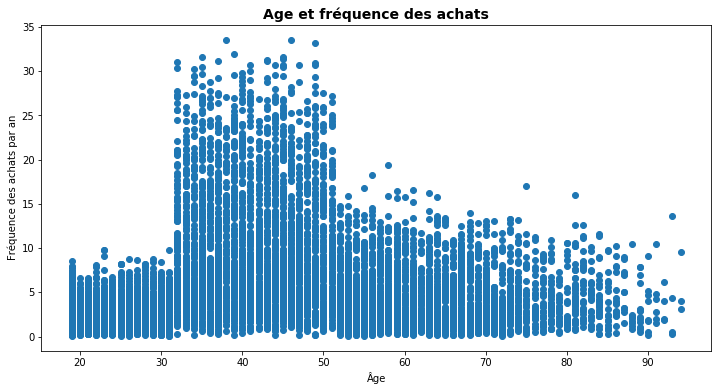

In [34]:
# Diagramme de dispersion
X = df_freq["age"]
y = df_freq["nb_achats"]

plt.figure(figsize=(12,6))
plt.scatter (X,y)

plt.title("Age et fréquence des achats", fontsize =14, fontweight="bold")
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats par an")
plt.show()

#Sauvegarde en PNG
fig.savefig("graph_scatter age et frequence des achats.png")
plt.close(fig)

In [35]:
# Calcul de la régression linéaire
X = df_freq[["age"]]
y = df_freq["nb_achats"]

X = X.assign(intercept = [1]*X.shape[0])

lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.001     
Dependent Variable: nb_achats        AIC:                54180.1173
Date:               2022-03-25 12:39 BIC:                54194.2354
No. Observations:   8596             Log-Likelihood:     -27088.   
Df Model:           1                F-statistic:        7.968     
Df Residuals:       8594             Prob (F-statistic): 0.00477   
R-squared:          0.001            Scale:              31.971    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
age            0.0102     0.0036    2.8227   0.0048   0.0031   0.0173
intercept      5.6781     0.1725   32.9167   0.0000   5.3400   6.0162
-------------------------------------------------------------------
Omnibus:              2860.967      Durbin-Watson:      

In [36]:
# Affichage de a et b, coefficients de ma droite de régression linéaire
print(lr.params)

age          0.010180
intercept    5.678094
dtype: float64


In [37]:
# Stockage de a et b dans les variables correspondantes
a,b = lr.params["age"],lr.params["intercept"]

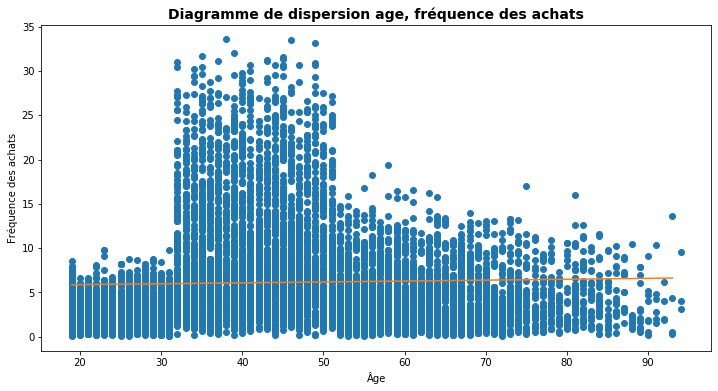

In [38]:
# Créer la régression linéaire
X = df_freq["age"]
y = df_freq["nb_achats"]
plt.figure(figsize=(12,6))
plt.plot(X, y, "o")
plt.plot(np.arange(min(X), max(X)), [a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion age, fréquence des achats", fontsize = 14, fontweight="bold")
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()


**La régression linéaire n'est pas adaptée -> Faire ANOVA.**

In [39]:
# Groupby sur l'id_client pour avoir la fréquence d'achat

df_freq = df.groupby(["client_id","age_ranges"], observed = True).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)

In [40]:
df_freq

,client_id,age_ranges,nb_achats
0,c_1,62-73,3.250000
1,c_10,62-73,4.833333
2,c_100,30-40,0.666667
3,c_1000,52-61,10.416667
4,c_1001,41-51,8.500000
...,...,...,...
8591,c_995,62-73,1.166667
8592,c_996,52-61,7.916667
8593,c_997,19-29,4.916667
8594,c_998,19-29,4.416667


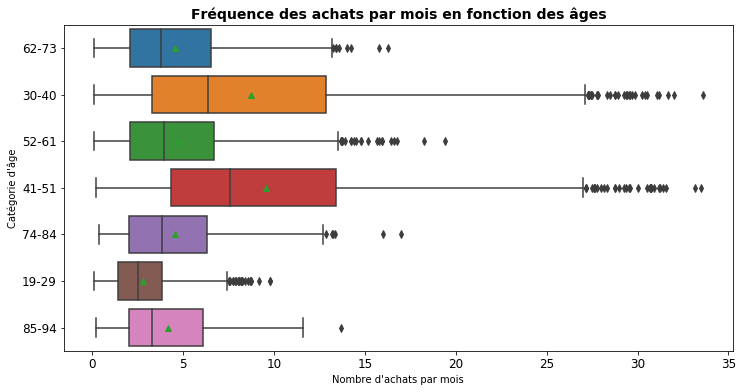

In [41]:
# Visualization par boxplots

X = "nb_achats" 
Y = "age_ranges"

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_freq[X], y=df_freq[Y], showmeans=True)
plt.title("Fréquence des achats par mois en fonction des âges", fontsize = 14, fontweight= "bold")
plt.xlabel("Nombre d'achats par mois")
plt.ylabel("Catégorie d'âge")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [42]:
# Calcul de l'ANOVA

linear_model = ols("nb_achats ~ C(age_ranges)", data=df_freq).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                      sum_sq      df           F  PR(>F)
C(age_ranges)   62842.766483     6.0  423.991951     0.0
Residual       212172.471686  8589.0         NaN     NaN


In [43]:
pvalue = linear_model.f_pvalue
print("La p-value est égale à {}".format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print("Le coefficient de corrélation est égal à {}".format(rsquared))

La p-value est égale à 0.0
Le coefficient de corrélation est égal à 0.4780235234308734


In [44]:
# Affichage le summary
print(linear_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.228     
Dependent Variable: nb_achats        AIC:                51968.0484
Date:               2022-03-25 12:39 BIC:                52017.4618
No. Observations:   8596             Log-Likelihood:     -25977.   
Df Model:           6                F-statistic:        424.0     
Df Residuals:       8589             Prob (F-statistic): 0.00      
R-squared:          0.229            Scale:              24.703    
-------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------
Intercept              2.7560   0.1127 24.4490 0.0000 2.5351 2.9770
C(age_ranges)[T.30-40] 5.9468   0.1630 36.4776 0.0000 5.6272 6.2664
C(age_ranges)[T.41-51] 6.7789   0.1602 42.3121 0.0000 6.4648 7.0929
C(age_ranges)[T.52-61] 1.9756   0.1737 11.3727 0.0000 1.6351 2.316

In [45]:
# P-value : choix d'un seuil de probabilité standard, de 5%
norm = 0.05

#Conclusion

if pvalue < norm:
    if rsquared > 0.5:
        print("On rejette HO : il y a une corrélation forte entre la fréquence des achats et l'âge.")
    elif rsquared > 0.3:
        print("On rejette HO : il y a une corrélation moyenne entre la fréquence des achats et l'âge.")
    elif rsquared > 0.1:
        print("On rejette HO : il y a une petite corrélation entre la fréquence des achatset l'âge.")
elif pvalue > norm : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre la fréquence des achats et l'âge")

On rejette HO : il y a une corrélation moyenne entre la fréquence des achats et l'âge.


### 3.4. Etude de la corrélation entre âge et panier moyen

In [46]:
# Je calcule le panier moyen mensuel
def panier_moyen(x):
    d = {}
    d["panier"] = (x["price"].sum()/ x["session_id"].count())
    return pd.Series(d, index=["panier"])

In [47]:
# Je les regroupe par période et par tranche d'âge
df_age_panier = df.groupby(["month","age_ranges"]).apply(panier_moyen)

In [48]:
df_age_panier =  df_age_panier.reset_index()
df_age_panier

,month,age_ranges,panier
0,1,19-29,39.567002
1,1,30-40,15.269142
2,1,41-51,13.688452
3,1,52-61,17.237629
4,1,62-73,17.170865
...,...,...,...
79,12,41-51,13.498683
80,12,52-61,16.900016
81,12,62-73,17.039898
82,12,74-84,16.697274


In [49]:
df_age_panier = df_age_panier[["age_ranges","panier"]]
df_age_panier

,age_ranges,panier
0,19-29,39.567002
1,30-40,15.269142
2,41-51,13.688452
3,52-61,17.237629
4,62-73,17.170865
...,...,...
79,41-51,13.498683
80,52-61,16.900016
81,62-73,17.039898
82,74-84,16.697274


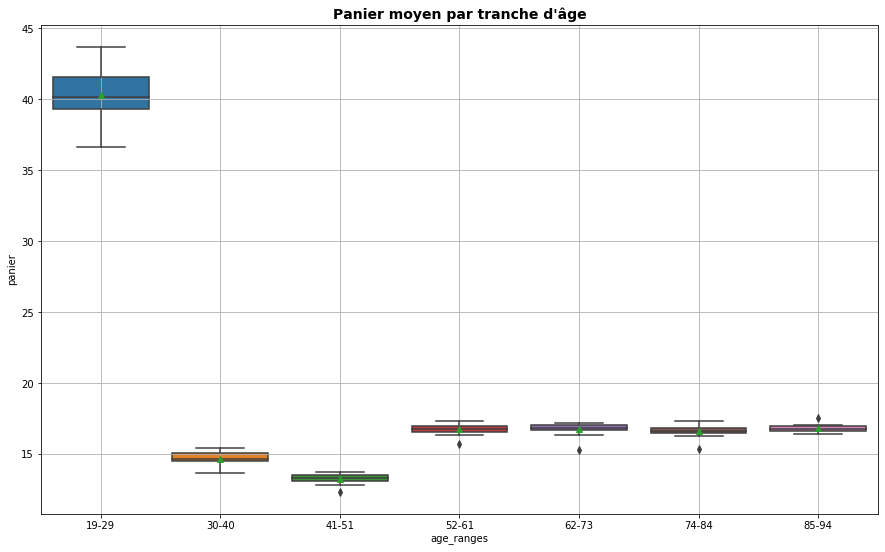

In [50]:
# Boxplot

fig = plt.figure(figsize=(15,9))

sns.boxplot(x="age_ranges",y="panier",data=df_age_panier, showmeans=True)
plt.title("Panier moyen par tranche d'âge", fontsize=14, fontweight="bold")
plt.grid()
plt.show()

In [51]:
# Calcul de l'ANOVA
df_age_panier.panier = df_age_panier.panier.astype("float64")

linear_model = ols("panier ~ C(age_ranges)", data=df_age_panier).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                    sum_sq    df            F        PR(>F)
C(age_ranges)  6314.097785   6.0  1198.454542  7.245227e-74
Residual         67.612845  77.0          NaN           NaN


/Users/lethituong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
pvalue = linear_model.f_pvalue
print("La p-value est égale à {}".format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print("Le coefficient de corrélation est égal à {}".format(rsquared))


La p-value est égale à 7.245227386875832e-74
Le coefficient de corrélation est égal à 0.9946885020206421


In [53]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())

                     Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.989   
Dependent Variable:    panier              AIC:                   234.1521
Date:                  2022-03-25 12:39    BIC:                   251.1678
No. Observations:      84                  Log-Likelihood:        -110.08 
Df Model:              6                   F-statistic:           1198.   
Df Residuals:          77                  Prob (F-statistic):    7.25e-74
R-squared:             0.989               Scale:                 0.87809 
--------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               40.3350   0.2705 149.1088 0.0000  39.7963  40.8736
C(age_ranges)[T.30-40] -25.6309   0.3826 -66.9992 0.0000 -26.3926 -24.8691
C(age_ranges)[T.41-51] -27.0700   0.3826 -70.76

In [54]:
# P-value : choix d'un seuil de probabilité standard, de 5%
norm = 0.05

#Conclusion

if pvalue < norm:
    if rsquared > 0.5:
        print("On rejette HO : il y a une corrélation forte entre la taille du panier moyen et l'âge.")
    elif rsquared > 0.3:
        print("On rejette HO : il y a une corrélation moyenne entre la taille du panier moyen et l'âge.")
    elif rsquared > 0.1:
        print("On rejette HO : il y a une petite corrélation entre la taille du panier moyen et l'âge.")
elif pvalue > norm: 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre la taille du panier moyen et l'âge")

On rejette HO : il y a une corrélation forte entre la taille du panier moyen et l'âge.


### 3.5. Etude de la corrélation entre âge et catégorie de produit

**On va faire un test de Chi²**

In [55]:
df_age_categ = df[["age_ranges","categ"]]

In [56]:
# Le tableau de contingence réel
X = "age_ranges"
Y = "categ"

cont_1 = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

categ,0,1,2,Total
age_ranges,,,,
19-29,14414,24119,25760,64293
30-40,136264,44972,4761,185997
41-51,165443,51807,833,218083
52-61,34745,44831,711,80287
62-73,24351,31044,520,55915
74-84,9618,12239,194,22051
85-94,2658,3336,69,6063
Total,387493,212348,32848,632689


In [57]:
# Tableau de contingence théorique

cont_1=cont_1.copy()
tx=df[X].value_counts()
ty=df[Y].value_counts()

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ["foo"]
ty.columns= ["foo"]
n = len(df)
indep = tx.dot(ty.T)/n

print("tableau des effectifs théoriques : ")
indep


tableau des effectifs théoriques : 


,0,1,2
41-51,133565.837116,73194.711594,11322.451290
30-40,113914.633447,62425.758874,9656.607679
52-61,49172.105870,26946.547002,4168.347128
19-29,39376.514289,21578.516402,3337.969309
62-73,34245.373469,18766.626921,2902.999610
74-84,13505.226332,7400.928020,1144.845648
85-94,3713.309476,2034.911187,314.779337


In [58]:
chi2, p, dof, exp = stats.chi2_contingency(cont_1)

In [59]:
print(chi2)

240272.9242918959


In [60]:
print(p)

0.0


In [61]:
if p > .05:
    print("H0: les valeurs sont independantes")
else:
    print("H1: Il y a une dépendance entre les deux valeurs.")

H1: Il y a une dépendance entre les deux valeurs.


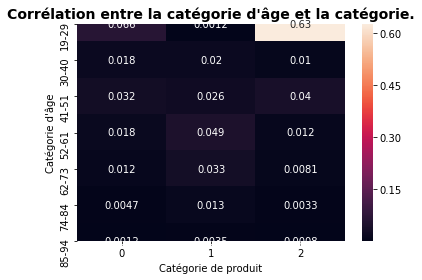

In [62]:
tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont_1.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True)
plt.title("Corrélation entre la catégorie d'âge et la catégorie.", fontsize = 14, fontweight="bold")
plt.ylabel("Catégorie d'âge")
plt.xlabel("Catégorie de produit")
plt.show()

**Il y a une forte corrélation entre les personnes âgés de 19-29 ans pour la catégorie 2 des produits.**